In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
p1 = '/content/drive/MyDrive/Colab Notebooks/MVT/Mobile.csv'
df = pd.read_csv(p1)

Mounted at /content/drive


In [ ]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [ ]:
df.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [ ]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [ ]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

###Data Preparation
Data preparation follows a series of steps that starts with collecting the right data, followed by cleaning, labeling, and then validation and visualization.

In [ ]:
np.array(df["Screen Size (inches)"])

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.1', '6.7', '6.67', '6.55',
       '6.78', '6.43', '6.5', '6.62', '5.4', '6.7', '6.55', '6.2', '6.51',
       '6.5', '6.43', '6.5', '6.6', '6.5', '6.55', '6.67', '6.1', '6.5',
       '6.5', '6.51', '6.5', '6.7', '6.5', '4.7', '6.5', '6.58', '6.5',
       '6.4', '6.43', '6.5', '6.1', '6.52', '6.5', '6.4', '6.43', '6.67',
       '5.4', '6.44', '6.5', '6.5', '6.52', '6.53', '6.5', '6.51', '6.5',
       '6.5', '6.51', '6.53', '6.7', '6.58', '6.7', '6.55', '6.5', '4.7',
       '6.58', '6.5', '6.5', '6.43', '6.43', '6.1', '6.51', '6.5', '6.6',
       '6.43', '6.55', '6.1', '6.56', '6.5', '6.1', '6.2', '6.43', '6.4',
       '6.67', '6.43', '6.78', '6.55', '6.7', '6.67', '6.1', '6.8 + 3.9',
       '6.67', '4.5', '6.7', '6.67', '6.5', '6.43', '6.58', '6.8', '6.39',
       '6.7', '5.9', '4.5', '5.5', '6.7', '6.7', '6.81', '6.52', '6.51',
       '6.5', '6.5', '6.5', '6.5', '6.5', '6.78', '6.8', '5.99', '6.55',
       '6.5', '6.5', '6.5', '6.5', '6.5', 

In [ ]:
df["Price ($)"]=df["Price ($)"].str.extract('(\d+)', expand=False)


In [ ]:
df["Price ($)"]

0       999
1      1199
2       899
3       279
4       799
       ... 
402    1049
403     349
404    1099
405     429
406     649
Name: Price ($), Length: 407, dtype: object

In [ ]:
df["Price ($)"]=df["Price ($)"].astype(int)

In [ ]:
df["RAM "]=df["RAM "].str.replace("GB","")
df["RAM "]=df["RAM "].astype(int)

In [ ]:
df["Storage "]=df["Storage "].str.replace("GB","")
df["Storage "]=df["Storage "].astype(int)

In [ ]:
df['n_cameras'] = df['Camera (MP)'].str.count('\\+') + 1

In [ ]:
res1 = []
res2 = []
res3 = []
res4 = []
for x in df['Camera (MP)']:
    resolutions = x.split('+')
    tam = len(resolutions)

    if tam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')

    if tam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')

    if tam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')

    if tam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])

df['res1'] = res1
df['res2'] = res2
df['res3'] = res3
df['res4'] = res4

df= df.drop(columns='Camera (MP)')
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4
0,Apple,iPhone 13 Pro,128,6,6.1,3095,999,3,12,12,12,0
1,Samsung,Galaxy S21 Ultra,256,12,6.8,5000,1199,4,108,10,10,12
2,OnePlus,9 Pro,128,8,6.7,4500,899,4,48,50,8,2
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,4,64,8,5,2
4,Google,Pixel 6,128,8,6.4,4614,799,2,50,12.2,0,0


In [ ]:
df['Screen Size (inches)'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')

In [ ]:
cem1 = []
cem2 = []
cem3 = []
for x in df['Screen Size (inches)']:
    resolutions = x.split('.')
    tam = len(resolutions)

    if tam == 1:
        cem1.append(resolutions[0])
        cem2.append('0')
        cem3.append('0')

    if tam == 2:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append('0')

    if tam == 3:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append(resolutions[2])


df['cem1'] = cem1
df['cem2'] = cem2
df['cem3'] = cem3

df= df.drop(columns='Screen Size (inches)')

In [ ]:
df["screen"] = df['cem1']+"."+ df["cem2"]
df=df.drop(["cem1","cem2","cem3"],axis=1)
df

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.1
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.8
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.7
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12.2,0,0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,4300,1049,3,12,64,12,0,6.7
403,Xiaomi,Mi 10 Lite 5G,128,6,4160,349,4,48,8,2,2,6.57
404,Apple,iPhone 12 Pro Max,128,6,3687,1099,3,12,12,12,0,6.7
405,Oppo,Reno3,128,8,4025,429,4,48,13,8,2,6.4


In [ ]:
df["screen"]=df["screen"].astype(float)

In [ ]:
df["res1"]=df["res1"].str.extract('(\d+)', expand=False)

In [ ]:
df["res1"]=df["res1"].astype(int)

In [ ]:
df["res2"]=df["res2"].str.extract('(\d+)', expand=False)

In [ ]:
df["res2"]=df["res2"].astype(int)

In [ ]:
df["res3"]=df["res3"].str.extract('(\d+)', expand=False)

In [ ]:
df["res3"]=df["res3"].astype(int)

In [ ]:
np.array(df["res4"])

array(['0', ' 12', ' 2', ' 2', '0', '0', '0', ' 2', ' 2', ' 8', '0', ' 5',
       '0', '0', ' 3', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0',
       ' 2', '0', '0', '0', '0', '0', ' 5', ' 2', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       ' 2', '0', '0', '0', ' 5', '0', ' 2', '0', '0', ' 5', ' 2', '0',
       '0', '0', ' 2', ' 5', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       '0', '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 8MP', ' 2MP',
       '0', '0', '0', '0', '0', '0', ' 5MP', ' 2MP', '0', ' 2MP', '0',
       '0', '0', ' 2MP', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 2MP', '0', '0', '0',
       ' 2MP', '0', '0', '0', ' 2MP', '0', '0', '0', ' 5MP', ' 2MP', '0',
       '0', ' 5MP', '0', '0', '0', '0', '0', '0', ' 2MP', '0', '0', '0',
       '0', ' 2MP', '0', '0', ' 10MP', '0', '0', '0', '0', '0', ' 2MP',
       '0', '0', '0', '0', '0', '0', '0', '0', ' 2MP

In [ ]:
df["res4"]=df["res4"].str.extract('(\d+)', expand=False)

In [ ]:
df['res4'].isnull().sum()

1

In [ ]:
df['res4'] = df['res4'].fillna(0)

In [ ]:
df['res4'].isnull().sum()

0

In [ ]:
df['res4'] = df['res4'].astype(int)

In [ ]:
df.head()

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.10
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.80
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.70
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12,0,0,6.40


In [ ]:
# Select numeric columns for skewness and kurtosis analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
print(numeric_columns)

Index(['Storage ', 'RAM ', 'Battery Capacity (mAh)', 'Price ($)', 'n_cameras',
       'res1', 'res2', 'res3', 'res4', 'screen'],
      dtype='object')


###HIERARCHICAL CLUSTERING

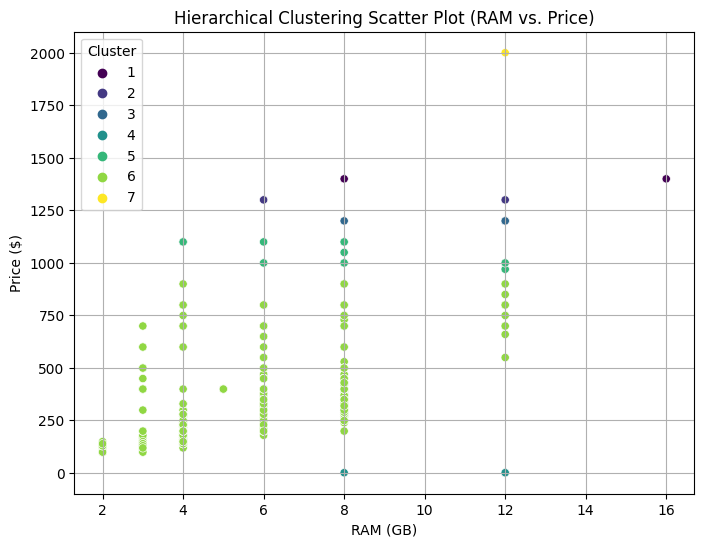

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the 'df' DataFrame and 'clusters' variable.

ram = df["RAM "]
price = df["Price ($)"]

# Add the 'clusters' column to the DataFrame with cluster assignments
df["Cluster"] = clusters

# Create a scatter plot without the legend
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="RAM ", y="Price ($)", hue="Cluster", palette="viridis")
plt.title("Hierarchical Clustering Scatter Plot (RAM vs. Price)")
plt.xlabel("RAM (GB)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()


####Ward Linkage

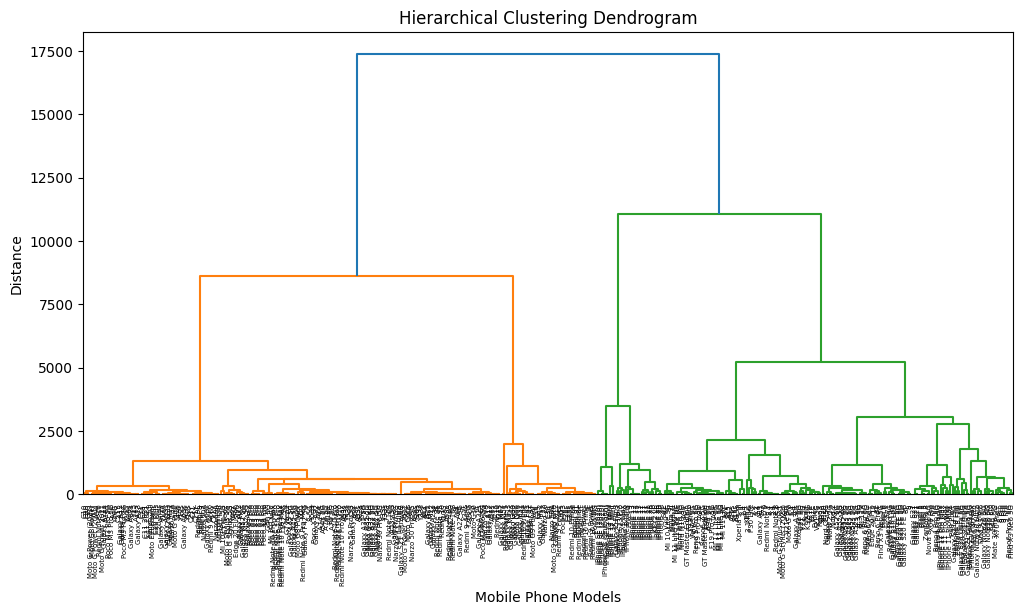

In [ ]:
features = df[['Storage ', 'RAM ', 'Battery Capacity (mAh)', 'Price ($)']]
Z = linkage(features, method='ward')

# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df["Model"].tolist(), orientation='top', leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Mobile Phone Models")
plt.ylabel("Distance")
plt.show()

In [ ]:
features = df[["RAM ", "Price ($)"]]

n_clusters = 4

hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

y_hc = hc.fit_predict(features)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


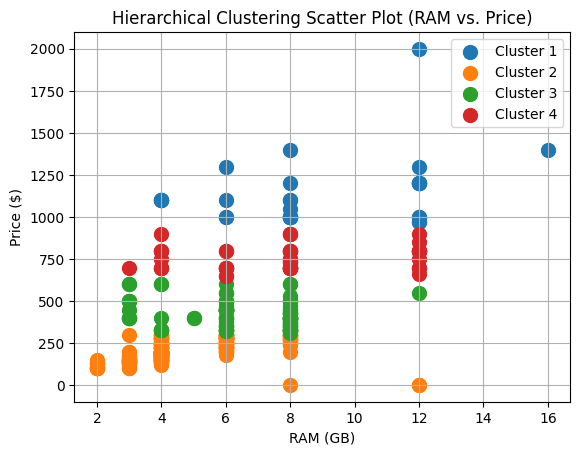

In [ ]:
# Create scatter plots to visualize the clusters
for cluster_label in range(n_clusters):
    plt.scatter(features[y_hc == cluster_label]["RAM "], features[y_hc == cluster_label]["Price ($)"], s=100, label=f'Cluster {cluster_label + 1}')

# Customize the plot
plt.title("Hierarchical Clustering Scatter Plot (RAM vs. Price)")
plt.xlabel("RAM (GB)")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

####Single Linkage

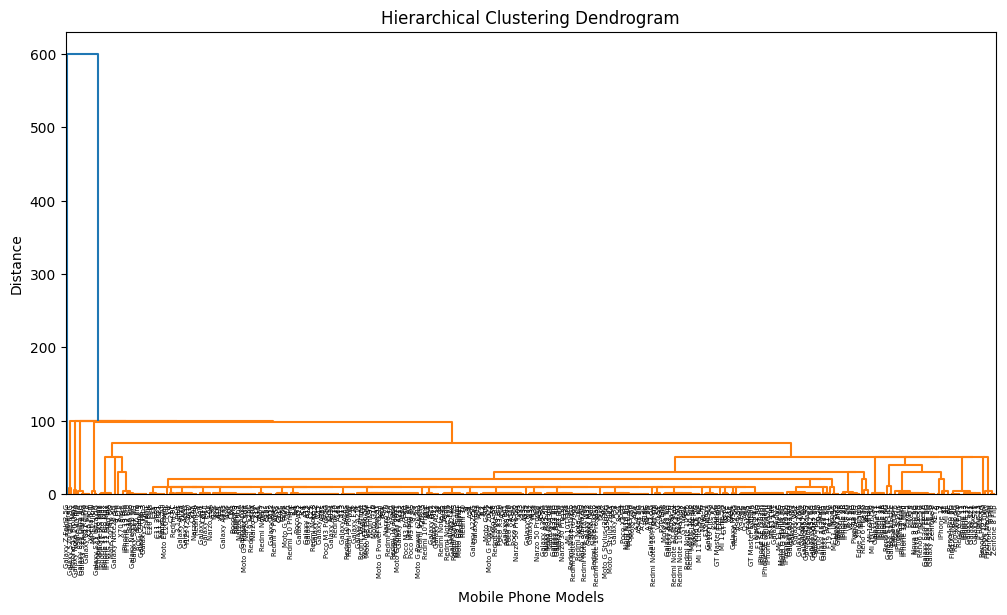

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(features, method='single', metric='euclidean')
threshold = 50
clusters = fcluster(Z, threshold, criterion='distance')
plt.figure(figsize=(12, 6))
dendrogram(Z, labels= df["Model"].tolist(), orientation='top', leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Mobile Phone Models")
plt.ylabel("Distance")
plt.show()

In [ ]:
features = df[["RAM ", "Price ($)"]]

n_clusters = 4

hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='single')

y_hc = hc.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


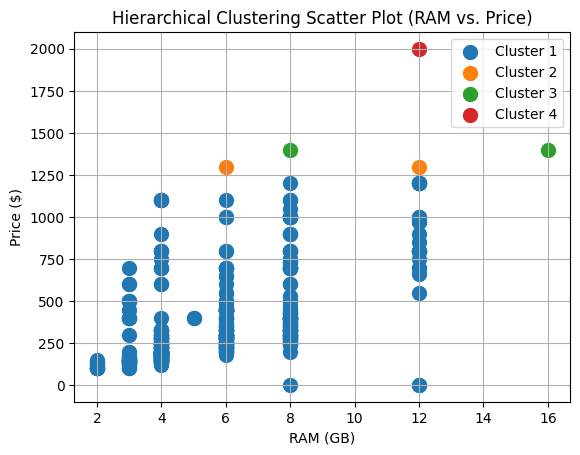

In [ ]:
# Create scatter plots to visualize the clusters
for cluster_label in range(n_clusters):
    plt.scatter(features[y_hc == cluster_label]["RAM "], features[y_hc == cluster_label]["Price ($)"], s=100, label=f'Cluster {cluster_label + 1}')

# Customize the plot
plt.title("Hierarchical Clustering Scatter Plot (RAM vs. Price)")
plt.xlabel("RAM (GB)")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

####Complete Linkage

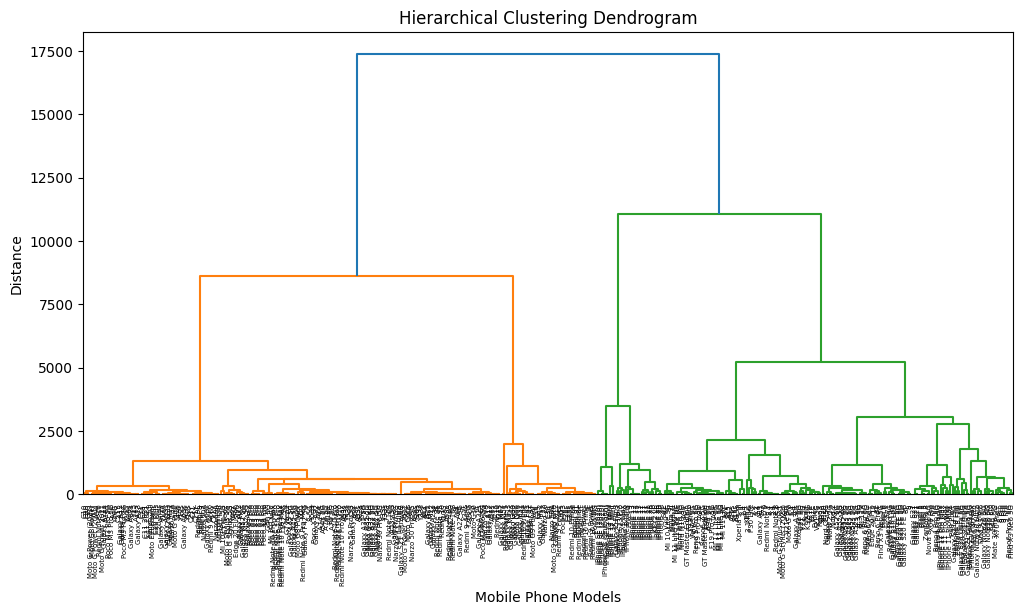

In [ ]:
features = df[['Storage ', 'RAM ', 'Battery Capacity (mAh)', 'Price ($)']]
Z = linkage(features, method='complete')

# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df["Model"].tolist(), orientation='top', leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Mobile Phone Models")
plt.ylabel("Distance")
plt.show()

In [ ]:
features = df[["RAM ", "Price ($)"]]

n_clusters = 4

hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')

y_hc = hc.fit_predict(features)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


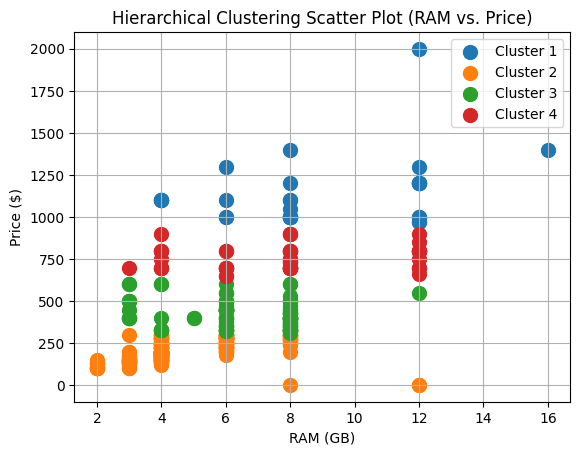

In [ ]:
# Create scatter plots to visualize the clusters
for cluster_label in range(n_clusters):
    plt.scatter(features[y_hc == cluster_label]["RAM "], features[y_hc == cluster_label]["Price ($)"], s=100, label=f'Cluster {cluster_label + 1}')

# Customize the plot
plt.title("Hierarchical Clustering Scatter Plot (RAM vs. Price)")
plt.xlabel("RAM (GB)")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

####Cluster Evaluation

In [59]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Select the "RAM" and "Price" columns as features
x = df[["RAM ", "Price ($)"]]

# Create a KMeans clustering model
n_clusters = 3
km = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model and get cluster assignments
cluster_labels = km.fit_predict(x)

# Calculate the silhouette score
score = silhouette_score(x, cluster_labels, metric='euclidean')

print('Silhouette Score: %.3f' % score)


Silhouette Score: 0.681


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
